<a href="https://colab.research.google.com/github/nadhirasafa/User-Enrollment-Patterns-Analysis/blob/main/Pattern%20Analysis%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.cluster import KMeans

In [ ]:
#Ignore warnings during code execution
import warnings
warnings.filterwarnings('ignore')

#Upload Dataset

In [ ]:
#Upload dataset
from google.colab import files
upload = files.upload()


Saving Project 4 _ Analisis pola peminatan pengguna kelas pelatihan kerja pada platform MasaDepan.ku..xlsx to Project 4 _ Analisis pola peminatan pengguna kelas pelatihan kerja pada platform MasaDepan.ku..xlsx


In [ ]:
#Load dataset
data = pd.read_excel('Project 4 _ Analisis pola peminatan pengguna kelas pelatihan kerja pada platform MasaDepan.ku..xlsx')

#Exploratory Data Analysis

In [ ]:
#Retrieve data dimensions
data.shape

(5430, 16)

In [ ]:
data.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

In [ ]:
#Show dataframe summary
data.describe(include = 'all')

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
count,5430.000000,5430,5430,5364,5430,5430,5430,5430,5430,5430,4912,5430.000000,5430.000000,4600.000000,4909.000000,4909
unique,NaN,5349,4199,NaN,4,696,432,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4030
top,NaN,20b1c674d2dfa2ed39aa81011934e786,Muh***********,NaN,Laki-laki,89ecd896ec4b7ee6bbdab2f06faddaa8,Men*******************************************...,Pendidikan & Pelatihan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kelas sangat menarik
freq,NaN,3,16,NaN,1413,391,406,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
mean,2715.500000,NaN,NaN,1991-05-04 22:35:10.067114112,NaN,NaN,NaN,NaN,2021-08-28 07:36:29.530018560,2022-04-19 16:44:17.626887680,2021-08-26 17:47:14.765675776,30.884162,38.681768,75.102389,4.901406,NaN
min,1.000000,NaN,NaN,1940-08-24 00:00:00,NaN,NaN,NaN,NaN,2020-04-22 00:00:00,2020-09-15 11:18:41,2020-04-22 13:26:01,0.000000,0.000000,0.000000,1.000000,NaN
25%,1358.250000,NaN,NaN,1985-11-23 06:00:00,NaN,NaN,NaN,NaN,2020-09-29 00:00:00,2021-04-13 05:04:07.750000128,2020-09-30 08:32:39.500000,13.000000,19.000000,73.000000,5.000000,NaN
50%,2715.500000,NaN,NaN,1993-06-23 00:00:00,NaN,NaN,NaN,NaN,2021-08-27 09:35:30.500000,2022-03-31 08:32:30,2021-08-28 05:00:42.500000,23.000000,29.000000,82.500000,5.000000,NaN
75%,4072.750000,NaN,NaN,1998-05-14 06:00:00,NaN,NaN,NaN,NaN,2022-06-13 14:45:28.500000,2023-08-24 08:50:55.500000,2022-06-07 04:50:29.249999872,48.000000,64.000000,90.000000,5.000000,NaN
max,5430.000000,NaN,NaN,2023-12-06 00:00:00,NaN,NaN,NaN,NaN,2023-10-21 03:16:53,2023-10-23 16:38:39,2023-10-23 03:04:14,161.000000,162.000000,100.000000,5.000000,NaN


In [ ]:
#Ambil kolom -> jenis_kelamin, nama_kelas, bidang_studi, aktivitas_selesai, total_aktivitas, skor_akhir, rating_kelas, dan review_kelas untuk di count value
includeCol = ['jenis_kelamin', 'nama_kelas', 'bidang_studi', 'aktivitas_selesai', 'total_aktivitas', 'skor_akhir', 'rating_kelas', 'review_kelas']
temp = data[includeCol]
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jenis_kelamin      5430 non-null   object 
 1   nama_kelas         5430 non-null   object 
 2   bidang_studi       5430 non-null   object 
 3   aktivitas_selesai  5430 non-null   int64  
 4   total_aktivitas    5430 non-null   int64  
 5   skor_akhir         4600 non-null   float64
 6   rating_kelas       4909 non-null   float64
 7   review_kelas       4909 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 339.5+ KB


In [ ]:
#Count value semua kolom pada variabel includeCol
for col in temp:
    value_counts = data[col].value_counts()
    print(f"\nValue counts for column: {col}")
    print(value_counts)


Value counts for column: jenis_kelamin
jenis_kelamin
Laki-laki    1413
Male         1373
Perempuan    1336
Female       1308
Name: count, dtype: int64

Value counts for column: nama_kelas
nama_kelas
Men***************************************************                  406
Men***********************************                                  396
Pen************************************************                     174
Men****************************************************                 158
Dig**************                                                       123
                                                                       ... 
Bel*****************************************************************      1
Ana************************************************                       1
Fre**********************************************                         1
Rag******************************************************                 1
Cus*************************************

#Data Preprocessing

##Data Duplicates

In [ ]:
# melihat apakah terdapat duplikat di data
print(f"Terdapat {data.duplicated().sum()} baris duplikat di data")

Terdapat 0 baris duplikat di data


Terlihat tidak ada data duplikat dibaris, lanjut mengecek typo pada setiap kolom.

## Data Typos

> **Insight**

 Pada `id_pendaftaran`, `id_pengguna`, `nama_pengguna` dan `tanggal_lahir` tidak ditemukan typo maupun duplikat baris, jadi kita lanjut cek pada kolom `jenis kelamin`

In [ ]:
# kita lihat isi dari kolom  jenis_kelamin
data['jenis_kelamin'].value_counts()

jenis_kelamin
Laki-laki    1413
Male         1373
Perempuan    1336
Female       1308
Name: count, dtype: int64

In [ ]:
#mengubah atau menyetarakan jenis kelamin
data['jenis_kelamin'] = data['jenis_kelamin'].str.lower()
data['jenis_kelamin'] = data['jenis_kelamin'].replace(['male', 'laki-laki'], 'laki laki')
data['jenis_kelamin'] = data['jenis_kelamin'].replace(['female', 'perempuan'], 'perempuan')

In [ ]:
# kita cek ulang kolom  jenis_kelamin
data['jenis_kelamin'].value_counts()

jenis_kelamin
laki laki    2786
perempuan    2644
Name: count, dtype: int64

**Insight**

Pada kolom `id_ kelas` tidak terlihat typo ataupun duplikat kolom, jadi kita lanjut ke kolom `nama_kelas`.

In [ ]:
# kita lihat isi dari kolom bidang_studi
data['nama_kelas'].value_counts()

nama_kelas
Men***************************************************                  406
Men***********************************                                  396
Pen************************************************                     174
Men****************************************************                 158
Dig**************                                                       123
                                                                       ... 
Bel*****************************************************************      1
Ana************************************************                       1
Fre**********************************************                         1
Rag******************************************************                 1
Cus***********************************************                        1
Name: count, Length: 432, dtype: int64

In [ ]:
# kita samakan value di kolom bidang_studi menjadi lowercase
data['nama_kelas'] = data['nama_kelas'].str.lower()

In [ ]:
# kita lihat isi dari kolom bidang_studi
data['nama_kelas'].value_counts()

nama_kelas
men***************************************************              406
men***********************************                              396
pen************************************************                 174
men****************************************************             158
dig**************                                                   123
                                                                   ... 
mem********************************                                   1
mer*************************************************************      1
mer***********************************                                1
slc******************************************                         1
cus***********************************************                    1
Name: count, Length: 431, dtype: int64

8. Kolom bidang_studi

In [ ]:
# kita lihat isi dari kolom bidang_studi
data['bidang_studi'].value_counts()

bidang_studi
Pendidikan & Pelatihan                          429
Bisnis Manajemen                                400
Digital & Teknologi                             285
Bisnis Layanan                                  254
Teknologi (IT)                                  171
                                               ... 
Pembuatan media belajar                           1
IPS                                               1
Teknologi Jaringan Brbasis Luas (WAN)             1
Otomatisasi Tata Kelola Sarana dan Prasarana      1
Agama Budha                                       1
Name: count, Length: 204, dtype: int64

In [ ]:
# kita samakan value di kolom bidang_studi menjadi lowercase
data['bidang_studi'] = data['bidang_studi'].str.lower()

In [ ]:
# kita cek ulang kolom bidang_studi
data['bidang_studi'].value_counts()

bidang_studi
pendidikan & pelatihan                          429
bisnis manajemen                                400
digital & teknologi                             285
bisnis layanan                                  254
teknologi (it)                                  171
                                               ... 
pembuatan media belajar                           1
ips                                               1
teknologi jaringan brbasis luas (wan)             1
otomatisasi tata kelola sarana dan prasarana      1
agama budha                                       1
Name: count, Length: 203, dtype: int64

In [ ]:
 data['bidang_studi'].unique().tolist()

['pemasaran',
 'pendidikan & pelatihan',
 'bahasa inggris',
 'digital & teknologi',
 'soft skills',
 'bisnis layanan',
 'jasa boga',
 'komputer akuntansi',
 'keuangan & akuntansi',
 'bisnis manajemen',
 'media & komunikasi',
 'komputer dan jaringan dasar',
 'kreatif',
 'bimbingan konseling',
 'produk kreatif dan kewirausahaan',
 'dasar desain grafis',
 'teknologi (it)',
 'ekonomi',
 'ekonomi bisnis',
 'bisnis online',
 'pendidikan',
 'praktik pariwisata',
 'literasi media',
 'desain publikasi',
 'desain & seni',
 'teknologi terapan',
 'desain grafis percetakan',
 'aplikasi perkantoran',
 'desain media interaktif',
 'self-development',
 'pengembangan diri',
 'bahasa',
 'kecantikan dasar',
 'bahasa indonesia',
 'bahasa dan sastra inggris',
 'bisnis e-commerce',
 'matematika',
 'tata boga',
 'pendidikan agama',
 'bahasa asing pilihan',
 'produk pastry dan bakery',
 'dasar desain',
 'komunikasi profesional',
 'komunikasi bisnis',
 'bahasa lainnya',
 'prakarya',
 'otomatisasi tata kelola pe

> **Insight**

 pada `tanggal_mendaftar`, `tanggal_terakhir_akses`, `tanggal_menyelesaikan`, `aktivitas_selesai`, `total_aktivitas`, `skor_akhir`, dan `rating kelas` tidak ditemukan typo maupun duplikat baris, jadi kita lanjut

16. Kolom review_kelas

In [ ]:
# kita lihat isi dari kolom review_kelas
data['review_kelas'].value_counts()

review_kelas
kelas sangat menarik                                                   66
Sangat bermanfaat                                                      64
bagus                                                                  55
sangat bermanfaat                                                      49
sangat membantu                                                        49
                                                                       ..
sangat membantu saya dalam wawancara kerja                              1
Sangat mudah dimengerti dan dipahami                                    1
Sangat bermanfaat untuk saya                                            1
mudah dipahami, penjelasan cukup jelas sehingga mudah di mengerti\n     1
Sangat bermanfaat\nMateri mudah dipahami                                1
Name: count, Length: 4030, dtype: int64

In [ ]:
# kita samakan value di kolom review_kelas menjadi lowercase
data['review_kelas'] = data['review_kelas'].str.lower()

In [ ]:
# lakukan pengecekan kembali ke kolom review_kelas
data['review_kelas'].value_counts()

review_kelas
sangat bermanfaat                                                                                      118
sangat membantu                                                                                         88
bagus                                                                                                   71
kelas sangat menarik                                                                                    68
mantap                                                                                                  53
                                                                                                      ... 
kelas yang menambah wawasan dan pemateri yang sangat ramah dan responsif terhadap peserta pelatihan      1
pembelajaran yang mudah dipahami dan penjelasannya pun mudah di mengerti.                                1
kelas sangat menarik dan sangat bermanfaat                                                               1
sangat membantu saya dal

##Missing Value

In [ ]:
#display struktur dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

In [ ]:
#cek jumlah missing value di tiap kolom
data.isna().sum()

id_pendaftaran              0
id_pengguna                 0
nama_pengguna               0
tanggal_lahir              66
jenis_kelamin               0
id_kelas                    0
nama_kelas                  0
bidang_studi                0
tanggal_mendaftar           0
tanggal_terakhir_akses      0
tanggal_menyelesaikan     518
aktivitas_selesai           0
total_aktivitas             0
skor_akhir                830
rating_kelas              521
review_kelas              521
dtype: int64

In [ ]:
#menghitung proporsi missing value di tiap kolom
#sebagai pertimbangan apakah missing value dapat dihapus atau harus diimputasi
#jika proporsi missing value tidak besar, maka missing value tersebut dapat dihapus
(data.isna().sum()/data.shape[0])*100

id_pendaftaran             0.000000
id_pengguna                0.000000
nama_pengguna              0.000000
tanggal_lahir              1.215470
jenis_kelamin              0.000000
id_kelas                   0.000000
nama_kelas                 0.000000
bidang_studi               0.000000
tanggal_mendaftar          0.000000
tanggal_terakhir_akses     0.000000
tanggal_menyelesaikan      9.539595
aktivitas_selesai          0.000000
total_aktivitas            0.000000
skor_akhir                15.285451
rating_kelas               9.594843
review_kelas               9.594843
dtype: float64

> Berdasarkan hasil output dari informasi di atas, telah diketahui bahwa:
> **Terdapat data missing value**, dengan detail berikut:
> *   Kolom `tanggal_lahir` memiliki 66 data missing value dengan proporsi 1.22%
> *   Kolom `tanggal_menyelesaikan` memiliki 518 data missing value dengan proporsi 9.54%
> *   Kolom `skor_akhir` memiliki 830 data missing value dengan proporsi 15.29%
> *   Kolom `rating_kelas` memiliki 521 data missing value dengan proporsi 9.6%
> *   Kolom `review_kelas` memiliki 521 data missing value 9.6%

In [ ]:
#mengatasi missing value pada kolom tanggal_lahir
#keputusan: menghapus data missing value pada kolom tanggal_lahir karena jumlahnya relatif sedikit
data = data.dropna(subset=['tanggal_lahir'])

In [ ]:
#mengatasi missing value pada kolom tanggal_menyelesaikan
#keputusan: mengisi missing value dengan modus karena kolom ini bertipe datetime, bukan numerik
#alasan imputasi: kolom review_kelas memiliki missing value cukup besar, ketika dihapus maka kemungkinan hasil analisis akan bias

#mencari modus dari kolom tanggal_menyelesaikan
modus_date = data['tanggal_menyelesaikan'].mode()[0]
print(f"Modus kolom tanggal_menyelesaikan: {modus_date}")

#mengisi missing values dengan nilai modus
data['tanggal_menyelesaikan'].fillna(modus_date, inplace=True)

Modus kolom tanggal_menyelesaikan: 2021-03-28 19:43:28


In [ ]:
#mengatasi missing value pada kolom skor_akhir
#alasan imputasi: kolom skor_akhir memiliki missing value cukup besar, ketika dihapus maka kemungkinan hasil analisis akan bias

#mengisi missing values dengan nilai median
data['skor_akhir'].fillna(0, inplace=True)

> Handling Missing Value di Kolom `Skor_Akhir`
* Keputusan: Mengisi missing value dengan 0
* Alasan: Logikanya apabila skor akhir tidak muncul, maka kemungkinan besar penggunanya tidak mengerjakan/tidak selesai jadi harusnya tidak dapat skor atau 0
* Pertimbangan lain: Kalau pakai median itu berarti diganti dengan 82.5 dan itu agak nggak fair?

In [ ]:
#mengatasi missing value pada kolom rating_kelas
#keputusan: mengisi missing value dengan nilai modus karena data pada kolom ini bertipe kategorik
#alasan imputasi: kolom rating_kelas memiliki missing value cukup besar, ketika dihapus maka kemungkinan hasil analisis akan bias

#menghitung nilai median
modus_rk = data['rating_kelas'].mode()[0]
print(f"Modus kolom rating_kelas: {modus_rk}")

#mengisi missing values dengan nilai median
data['rating_kelas'].fillna(modus_rk, inplace=True)

Modus kolom rating_kelas: 5.0


In [ ]:
#mengatasi missing value pada kolom review_kelas
#keputusan: mengisi missing value dengan modus karena kolom ini mengandung free text
#alasan imputasi: kolom review_kelas memiliki missing value cukup besar, ketika dihapus maka kemungkinan hasil analisis akan bias

#mencari modus textnya
modus_text = data['review_kelas'].mode()[0]
print(f"Modus kolom review_kelas: {modus_text}")

#mengisi missing values dengan modus textnya
data['review_kelas'].fillna(modus_text, inplace=True)

Modus kolom review_kelas: sangat bermanfaat


In [ ]:
#display isi table setelah dilakukan cleaning
data

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,perempuan,5d546faa0bf551fd84b9117c03f63311,pan**************************,pemasaran,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,laki laki,ba042968f0362aae24d2a001d1323af7,kel*********************************************,pendidikan & pelatihan,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,laki laki,98c097fad98132c31139dc8de9ce69cd,kel*******************************************,bahasa inggris,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,perempuan,4bc224deb0b8d2639c9e759ff6063023,men*******************************************,digital & teknologi,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,laki laki,77809dae4c51c080e1156ebbacba0c33,mud*******************************,soft skills,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,sangat baik.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,laki laki,fb41f1657e2c2edf6b9c86753022f6c9,tea***********************,pendidikan & pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,2021-03-28 19:43:28,1,26,0.0,5.0,sangat bermanfaat
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,perempuan,6d89a47b116dc3fd794d001d4df394a2,men*******************************************...,teknologi (it),2023-10-18 14:36:59,2023-10-23 06:12:16,2021-03-28 19:43:28,7,21,0.0,5.0,sangat bermanfaat
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,perempuan,d0a261660d3b3f7b818eb1b377fe1aae,men**********************************,perencanaan bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,2021-03-28 19:43:28,3,25,0.0,5.0,sangat bermanfaat
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,laki laki,1bbc33c05ea4bcc59386b13dfac009b0,cus*******************************************...,marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,2021-03-28 19:43:28,3,22,0.0,5.0,sangat bermanfaat


In [ ]:
#cek ulang jumlah missing value di tiap kolom setelah dilakukan handling missing value
data.isna().sum()

id_pendaftaran            0
id_pengguna               0
nama_pengguna             0
tanggal_lahir             0
jenis_kelamin             0
id_kelas                  0
nama_kelas                0
bidang_studi              0
tanggal_mendaftar         0
tanggal_terakhir_akses    0
tanggal_menyelesaikan     0
aktivitas_selesai         0
total_aktivitas           0
skor_akhir                0
rating_kelas              0
review_kelas              0
dtype: int64

In [ ]:
#retrieve the new data dimensions
data.shape

(5364, 16)

> Telah terbukti bahwa **sudah tidak ada missing value** pada data ini dengan total akhir sebanyak 5364 data tersisa bersama 16 kolom atau variabel.

##Outlier

> Pada bagian ini, akan dilakukan pengecekan outlier pada kolom `skor_akhir`, `aktivitas_selesai`, dan `total_aktivitas` karena kolom atau variabel itulah yang bersifat numerik dan akan memiliki peran penting dalam analisis lebih lanjut. Kolom `rating_kelas` tidak dicek karena datanya berupa skala likert.

> **Perlu diingat** pula bahwa problem question yang akan dijawab lebih menuju pada pencarian insight data untuk pengambilan keputusan bisnis, bukan pada pemodelan, prediksi, dan lainnya sehingga data outlier dapat sangat berguna untuk memahami kondisi bisnis maupun penggunanya. Oleh karena itu, tidak bisa sembarangan dihapus.

> Analisis yang rencana akan digunakan juga analisis cluster sehingga penghapusan outlier disini butuh banyak pertimbangan dan harus memerhatikan banyak aspek. Tidak bisa langsung dihapus semua karena analisis cluster juga sebenarnya tidak butuh asumsi normalitas data, hanya saja dikhawatirkan jika outlier tidak dihapus akan memengaruhi pembentukan clusternya, terutama untuk metode non-hierarki K-Means yang jumlah clusternya ditentukan oleh analisator.

### Outlier Kolom Total_Aktivitas

In [ ]:
#fungsi untuk cek ada tidaknya outlier data
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3-Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3+1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1-1.5*IQR))
  return list(bound[0])

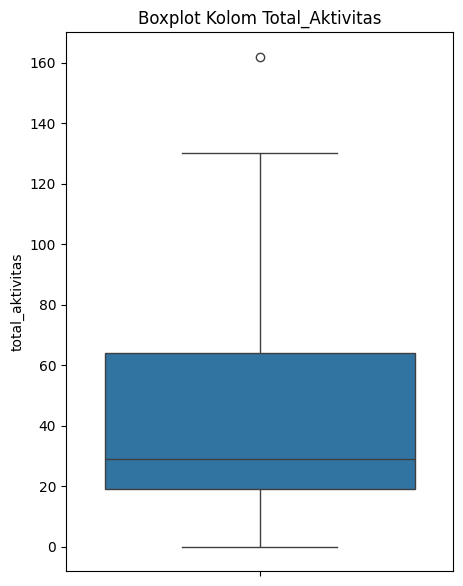

In [ ]:
#membuat visualisasi berupa boxplot dari kolom total_aktivitas
plt.figure(figsize = (5,7))
sns.boxplot(y='total_aktivitas', data = data)
plt.title('Boxplot Kolom Total_Aktivitas')
plt.show()

> Dari hasil output grafik di atas, terlihat hanya ada 1 data yang terindikasi sebagai outlier. Hal tersebut akan dibuktikan melalui perhitungan matematis.

In [ ]:
#cek outlier kolom skor_akhir dengan perhitungan matematis
upper_TA = cek_outlier('total_aktivitas','upper_bound')
lower_TA = cek_outlier('total_aktivitas','lower_bound')
print(f"Jumlah outlier pada kolom total_aktivitas ada sebanyak {len(upper_TA) + len(lower_TA)} data.")

Jumlah outlier pada kolom total_aktivitas ada sebanyak 1 data.


> * Dari hasil di atas, telah diketahui secara pasti bahwa jumlah data yang terindikasi outlier hanya 1. Karena jumlah tersebut **sangat sedikit**, maka tidak apa-apa untuk **dihapus**.
* Alasan lain yang mampu membawa keputusan penghapusan outlier adalah karena dari grafik boxplot terlihat bahwa nilai outliernya sangat jauh dengan data lainnya, yaitu di 160, sementara yang lain bahkan tidak menyentuh 130 sehingga jika outlier ini tidak dihapus dikhawatirkan dapat memengaruhi hasil analisis yang berencana untuk digunakan, yaitu analisis cluster. Ditakutkan akan memengaruhi penentuan centroid dan jumlah cluster optimal.
* Kepastian outlier tersebut akan dicek melalui langkah berikut:

In [ ]:
TA_filter = (data['total_aktivitas'] == 163).sum()
print(f"Data sama dengan 163: {TA_filter}")

TA_filter = (data['total_aktivitas'] == 162).sum()
print(f"Data sama dengan 162: {TA_filter}")

TA_filter = (data['total_aktivitas'] > 130).sum()
print(f"Data lebih dari 130: {TA_filter}")

TA_filter = (data['total_aktivitas'] > 129).sum()
print(f"Data lebih dari 129: {TA_filter}")

TA_filter = (data['total_aktivitas'] == 130).sum()
print(f"Data sama dengan 130: {TA_filter}")

Data sama dengan 163: 0
Data sama dengan 162: 1
Data lebih dari 130: 1
Data lebih dari 129: 2
Data sama dengan 130: 1


> Dari hasil output di atas, dapat diperoleh informasi bahwa:
* Data tertinggi sebelum outlier adalah 130
* Data outliernya terbukti di angka 162
* Terbukti bahwa jaraknya sangat jauh sehingga dikhawatirkan akan memengaruhi hasil analisis
* Maka, **outlier akan dihapus**

In [ ]:
#menghapus outlier pada kolom total_aktivitas
data = data.loc[data['total_aktivitas'] <= 132]

In [ ]:
#cek outlier kolom total_aktivitas setelah penghapusan outlier
upper_TA = cek_outlier('total_aktivitas','upper_bound')
lower_TA = cek_outlier('total_aktivitas','lower_bound')
print(f"Jumlah outlier pada kolom total_aktivitas ada sebanyak {len(upper_TA) + len(lower_TA)} data.")
print(f"Dimensi data setelah penghapusan outlier: {data.shape}")

Jumlah outlier pada kolom total_aktivitas ada sebanyak 0 data.
Dimensi data setelah penghapusan outlier: (5363, 16)


###Outlier Kolom Aktivitas_Selesai

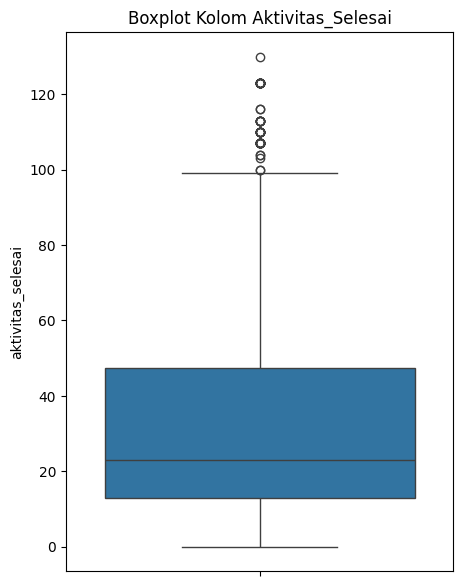

In [ ]:
#membuat visualisasi berupa boxplot dari kolom aktivitas_selesai
plt.figure(figsize = (5,7))
sns.boxplot(y='aktivitas_selesai', data = data)
plt.title('Boxplot Kolom Aktivitas_Selesai')
plt.show()

> Dari hasil grafik di atas, terlihat ada beberapa titik yang terindikasi outlier. Untuk memperjelas hasil dan jumlah tersebut, akan dilihat melalui perhitungan matematis.

In [ ]:
#cek outlier kolom aktivitas_selesai dengan perhitungan matematis
upper_as = cek_outlier('aktivitas_selesai','upper_bound')
lower_as = cek_outlier('aktivitas_selesai','lower_bound')
print(f"Jumlah outlier pada kolom aktivitas_selesai ada sebanyak {len(upper_as) + len(lower_as)} data.")

Jumlah outlier pada kolom aktivitas_selesai ada sebanyak 69 data.


> * Dari hasil di atas, telah diketahui secara pasti bahwa jumlah data yang terindikasi outlier ada 69.
* Kemudian, akan dicek apakah 69 tersebut merata atau tidak.
* Apabila tidak merata dan jaraknya jauh, maka akan dihapus. Apabila cukup merata dan jaraknya tidak jauh, maka tidak akan dihapus.

In [ ]:
AS_filter = (data['aktivitas_selesai'] > 99).sum()
print(f"Data lebih dari 99: {AS_filter}")

AS_filter = ((data['aktivitas_selesai'] > 99) & (data['aktivitas_selesai'] < 120)).sum()
print(f"Data lebih dari 99 dan kurang dari 120: {AS_filter}")

AS_filter = ((data['aktivitas_selesai'] > 120)).sum()
print(f"Data lebih dari 120: {AS_filter}")

AS_filter = ((data['aktivitas_selesai'] > 130)).sum()
print(f"Data lebih dari 130: {AS_filter}")

AS_filter = ((data['aktivitas_selesai'] == 130)).sum()
print(f"Data sama dengan 130: {AS_filter}")

Data lebih dari 99: 69
Data lebih dari 99 dan kurang dari 120: 50
Data lebih dari 120: 19
Data lebih dari 130: 0
Data sama dengan 130: 1


> Dari hasil output di atas, dapat diperoleh informasi bahwa:
* Data yang terindikasi outlier adalah data lebih dari 99
* Data outlier tertinggi adalah 130
* Data outlier antara 99 dan 120 tersebar rata dan jaraknya juga tidak terlalu jauh sehingga tidak perlu dihapus
* Sebenarnya, data outlier lebih dari 120 termasuk cukup banyak sehingga sebenarnya tidak benar-benar terpencil. Namun, sementara ini, akan dihapus demi keamanan analisis. Jika dibandingkan dengan keseluruhan data, 19 data juga cukup sedikit. Alasan ini juga akan diperkuat dengan grafik garis berikut.

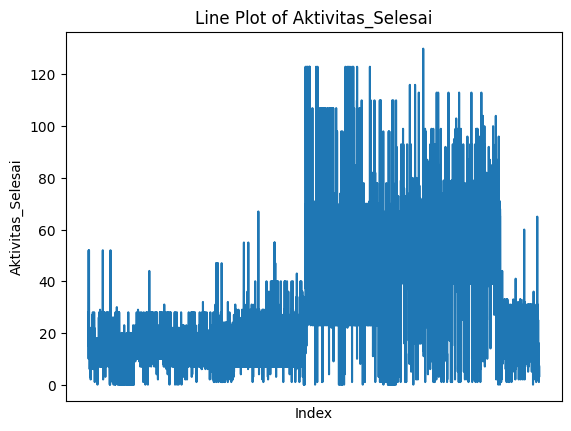

In [ ]:
#membuat line plot dari kolom aktivitas_selesai
plt.plot(data['aktivitas_selesai'])

#menambahkan judul dan label sumbu
plt.title('Line Plot of Aktivitas_Selesai')
plt.xlabel('Index')
plt.ylabel('Aktivitas_Selesai')

#mengatur label sumbu x agar tidak menampilkan index
plt.xticks([])

#menampilkan plot
plt.show()

> Grafik di atas menunjukkan bahwa data outlier lebih dari 120 ternyata tidak menyebar rata, sehingga semakin kuat alasan untuk menghapusnya.

In [ ]:
#menghapus outlier pada kolom aktivitas_selesai
data = data.loc[data['aktivitas_selesai'] <= 120]

In [ ]:
#cek outlier kolom total_aktivitas setelah penghapusan outlier
upper_as = cek_outlier('aktivitas_selesai','upper_bound')
lower_as = cek_outlier('aktivitas_selesai','lower_bound')
print(f"Jumlah outlier pada kolom aktivitas_selesai ada sebanyak {len(upper_as) + len(lower_as)} data.")
print(f"Dimensi data setelah penghapusan outlier: {data.shape}")

Jumlah outlier pada kolom aktivitas_selesai ada sebanyak 74 data.
Dimensi data setelah penghapusan outlier: (5344, 16)


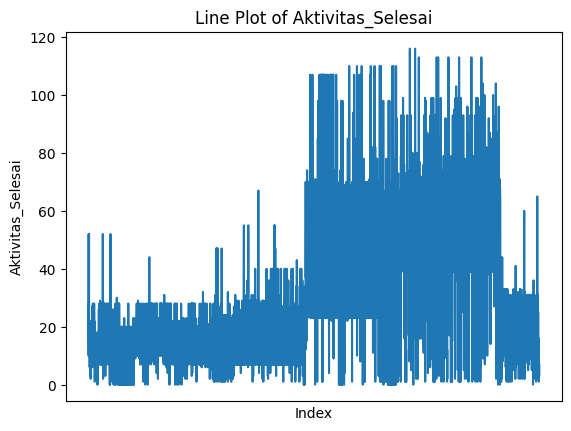

In [ ]:
#membuat line plot dari kolom aktivitas_selesai
plt.plot(data['aktivitas_selesai'])

#menambahkan judul dan label sumbu
plt.title('Line Plot of Aktivitas_Selesai')
plt.xlabel('Index')
plt.ylabel('Aktivitas_Selesai')

#mengatur label sumbu x agar tidak menampilkan index
plt.xticks([])

#menampilkan plot
plt.show()

> * Dari hasil di atas, terlihat bahwa outlier pada kolom ini semakin banyak. Grafik garisnya juga menunjukkan ada pencilan baru yang tidak merata sehingga keputusan tersebut dinilai kurang tepat.
* Maka, akan dicoba menghapus keseluruhan data outlier, yaitu 69 data. Jika outliernya turun dan pada grafik garis tampak tidak ada yang terpencil lagi, maka keputusan itulah yang diambil.


In [ ]:
#menghapus outlier pada kolom aktivitas_selesai
data = data.loc[data['aktivitas_selesai'] <= 99]

In [ ]:
#cek outlier kolom total_aktivitas setelah penghapusan outlier
upper_as = cek_outlier('aktivitas_selesai','upper_bound')
lower_as = cek_outlier('aktivitas_selesai','lower_bound')
print(f"Jumlah outlier pada kolom aktivitas_selesai ada sebanyak {len(upper_as) + len(lower_as)} data.")
print(f"Dimensi data setelah penghapusan outlier: {data.shape}")

Jumlah outlier pada kolom aktivitas_selesai ada sebanyak 27 data.
Dimensi data setelah penghapusan outlier: (5294, 16)


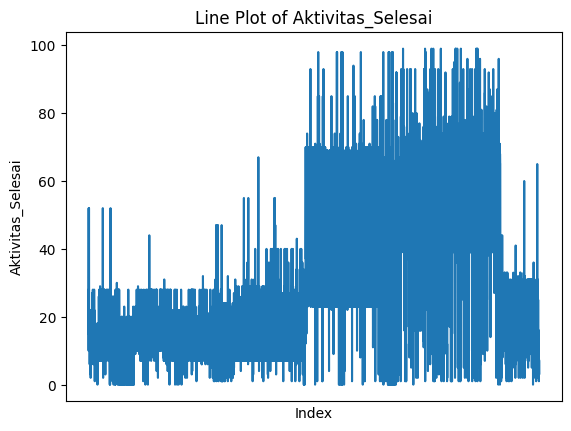

In [ ]:
#membuat line plot dari kolom aktivitas_selesai
plt.plot(data['aktivitas_selesai'])

#menambahkan judul dan label sumbu
plt.title('Line Plot of Aktivitas_Selesai')
plt.xlabel('Index')
plt.ylabel('Aktivitas_Selesai')

#mengatur label sumbu x agar tidak menampilkan index
plt.xticks([])

#menampilkan plot
plt.show()

> Dari penghapusan 69 data outlier di atas, dapat dilihat bahwa:
* Data outlier sudah turun
* Pada grafik garis, datanya tampak sudah merata sehingga handling outlier baru tidak perlu dilakukan.
* Outlier yang dihapus juga sudah banyak, maka handling outlier sudah cukup dan kolom aktivitas_selesai dapat dianggap sudah bersih.

### Outlier Kolom Skor_Akhir

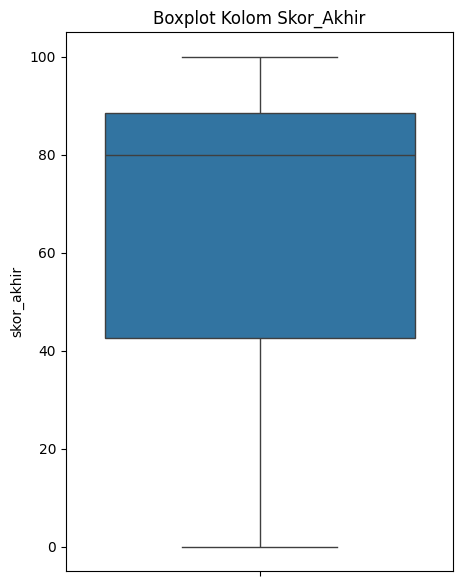

In [ ]:
#membuat visualisasi berupa boxplot dari kolom skor_akhir
plt.figure(figsize = (5,7))
sns.boxplot(y='skor_akhir', data = data)
plt.title('Boxplot Kolom Skor_Akhir')
plt.show()

In [ ]:
#cek outlier kolom skor_akhir dengan perhitungan matematis
upper_skor = cek_outlier('skor_akhir','upper_bound')
lower_skor = cek_outlier('skor_akhir','lower_bound')
print(f"Jumlah outlier pada kolom skor_akhir ada sebanyak {len(upper_skor) + len(lower_skor)} data.")

Jumlah outlier pada kolom skor_akhir ada sebanyak 0 data.


In [ ]:
#display data setelah handling outlier
data

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,perempuan,5d546faa0bf551fd84b9117c03f63311,pan**************************,pemasaran,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,laki laki,ba042968f0362aae24d2a001d1323af7,kel*********************************************,pendidikan & pelatihan,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,laki laki,98c097fad98132c31139dc8de9ce69cd,kel*******************************************,bahasa inggris,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,perempuan,4bc224deb0b8d2639c9e759ff6063023,men*******************************************,digital & teknologi,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,laki laki,77809dae4c51c080e1156ebbacba0c33,mud*******************************,soft skills,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,sangat baik.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,laki laki,fb41f1657e2c2edf6b9c86753022f6c9,tea***********************,pendidikan & pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,2021-03-28 19:43:28,1,26,0.0,5.0,sangat bermanfaat
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,perempuan,6d89a47b116dc3fd794d001d4df394a2,men*******************************************...,teknologi (it),2023-10-18 14:36:59,2023-10-23 06:12:16,2021-03-28 19:43:28,7,21,0.0,5.0,sangat bermanfaat
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,perempuan,d0a261660d3b3f7b818eb1b377fe1aae,men**********************************,perencanaan bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,2021-03-28 19:43:28,3,25,0.0,5.0,sangat bermanfaat
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,laki laki,1bbc33c05ea4bcc59386b13dfac009b0,cus*******************************************...,marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,2021-03-28 19:43:28,3,22,0.0,5.0,sangat bermanfaat


#Problem Question 1


Bidang studi apakah yang paling banyak diminati saat (>= April 2020) dan setelah pandemi berakhir (>= 1 Januari 2023)?

In [ ]:
# Mengubah kolom tanggal menjadi datetime
data['tanggal_mendaftar'] = pd.to_datetime(data['tanggal_mendaftar'])
data['tanggal_menyelesaikan'] = pd.to_datetime(data['tanggal_menyelesaikan'])

# Membuat filter waktu
filter_mendaftar = data['tanggal_mendaftar'] >= '2020-04-01'
filter_menyelesaikan = data['tanggal_menyelesaikan'] >= '2023-01-01'

# Menerapkan filter dan menghitung bidang studi yang paling populer
bidang_studi_populer = data[filter_mendaftar & filter_menyelesaikan]['bidang_studi'].value_counts()

# Menampilkan data
bidang_studi_populer

bidang_studi
administrasi umum          21
bisnis manajemen           15
administrasi               15
marketing                  14
dasar desain grafis        11
                           ..
desain                      1
bahasa                      1
dasar-dasar kreativitas     1
sketsa                      1
lainnya                     1
Name: count, Length: 111, dtype: int64

In [ ]:
print(f"Bidang studi yang paling banyak diminati sejak April 2020 dan setelah berakhir pada 1 Januari 2023 adalah: {bidang_studi_populer.idxmax()}")

Bidang studi yang paling banyak diminati sejak April 2020 dan setelah berakhir pada 1 Januari 2023 adalah: administrasi umum


#Problem Question 2


Bagaimana trend bulanan pendaftaran kelas untuk setiap bidang studi saat dan setelah pandemi ?

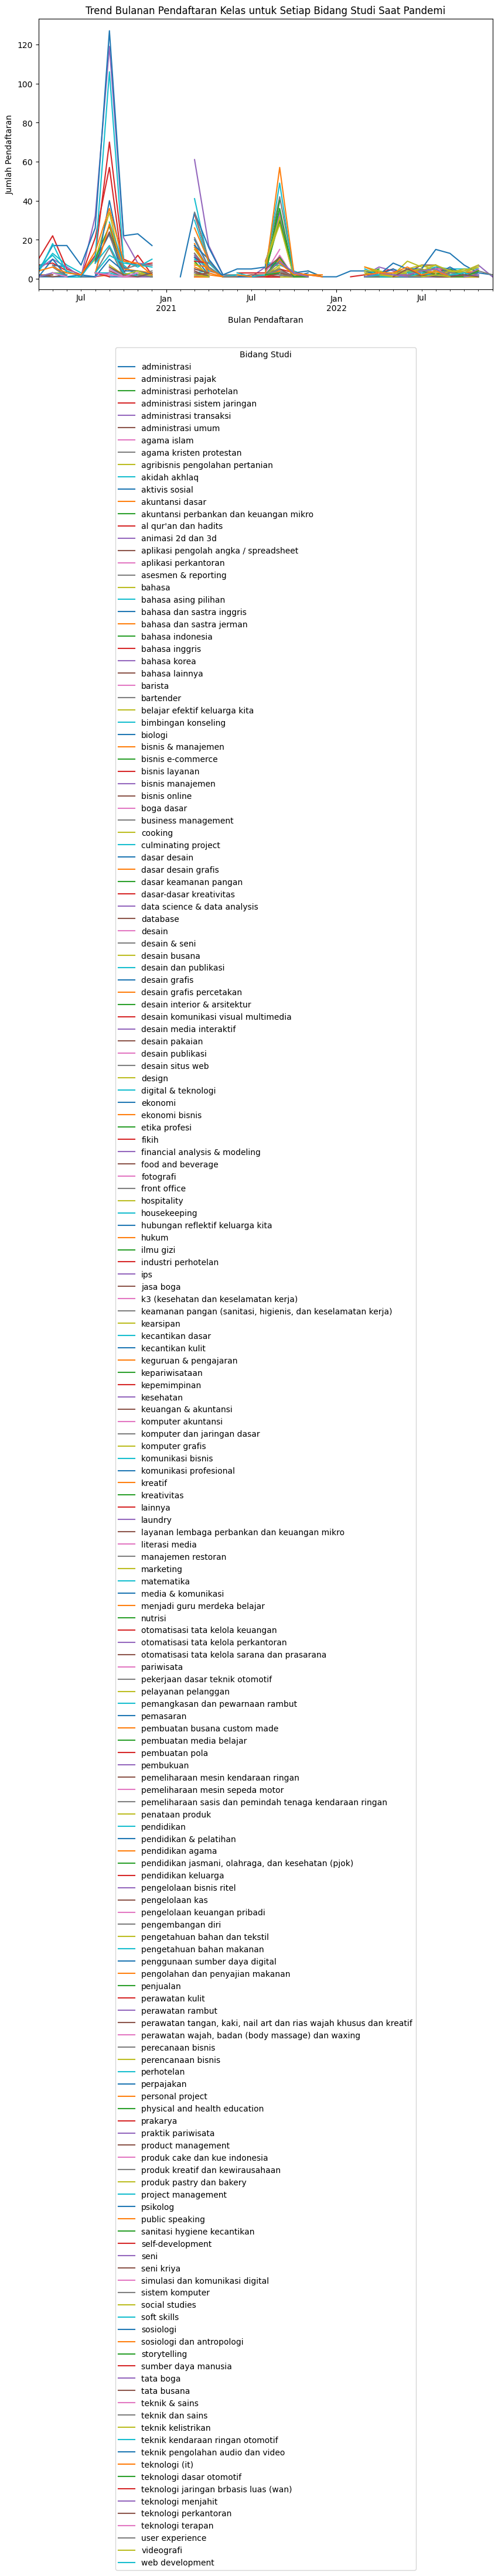

In [ ]:
# Mengubah kolom tanggal menjadi datetime
data['tanggal_mendaftar'] = pd.to_datetime(data['tanggal_mendaftar'])

# Membuat filter waktu
filter_mendaftar1 = data['tanggal_mendaftar'] >= '2020-04-01'
filter_mendaftar2 = data['tanggal_mendaftar'] < '2023-01-01'

# Menerapkan filter dan menghitung jumlah pendaftaran per bulan untuk setiap bidang studi
data_filtered = data[filter_mendaftar1 & filter_mendaftar2]
data_filtered['bulan_mendaftar'] = data_filtered['tanggal_mendaftar'].dt.to_period('M')
trend_pendaftaran = data_filtered.groupby(['bulan_mendaftar', 'bidang_studi']).size().unstack()

# Membuat plot
trend_pendaftaran.plot(kind='line', figsize=(10, 6))
plt.title('Trend Bulanan Pendaftaran Kelas untuk Setiap Bidang Studi Saat Pandemi')
plt.xlabel('Bulan Pendaftaran')
plt.ylabel('Jumlah Pendaftaran')
plt.legend(title='Bidang Studi', bbox_to_anchor=(0.5, -0.2), loc='upper center')
plt.tight_layout()
plt.show()

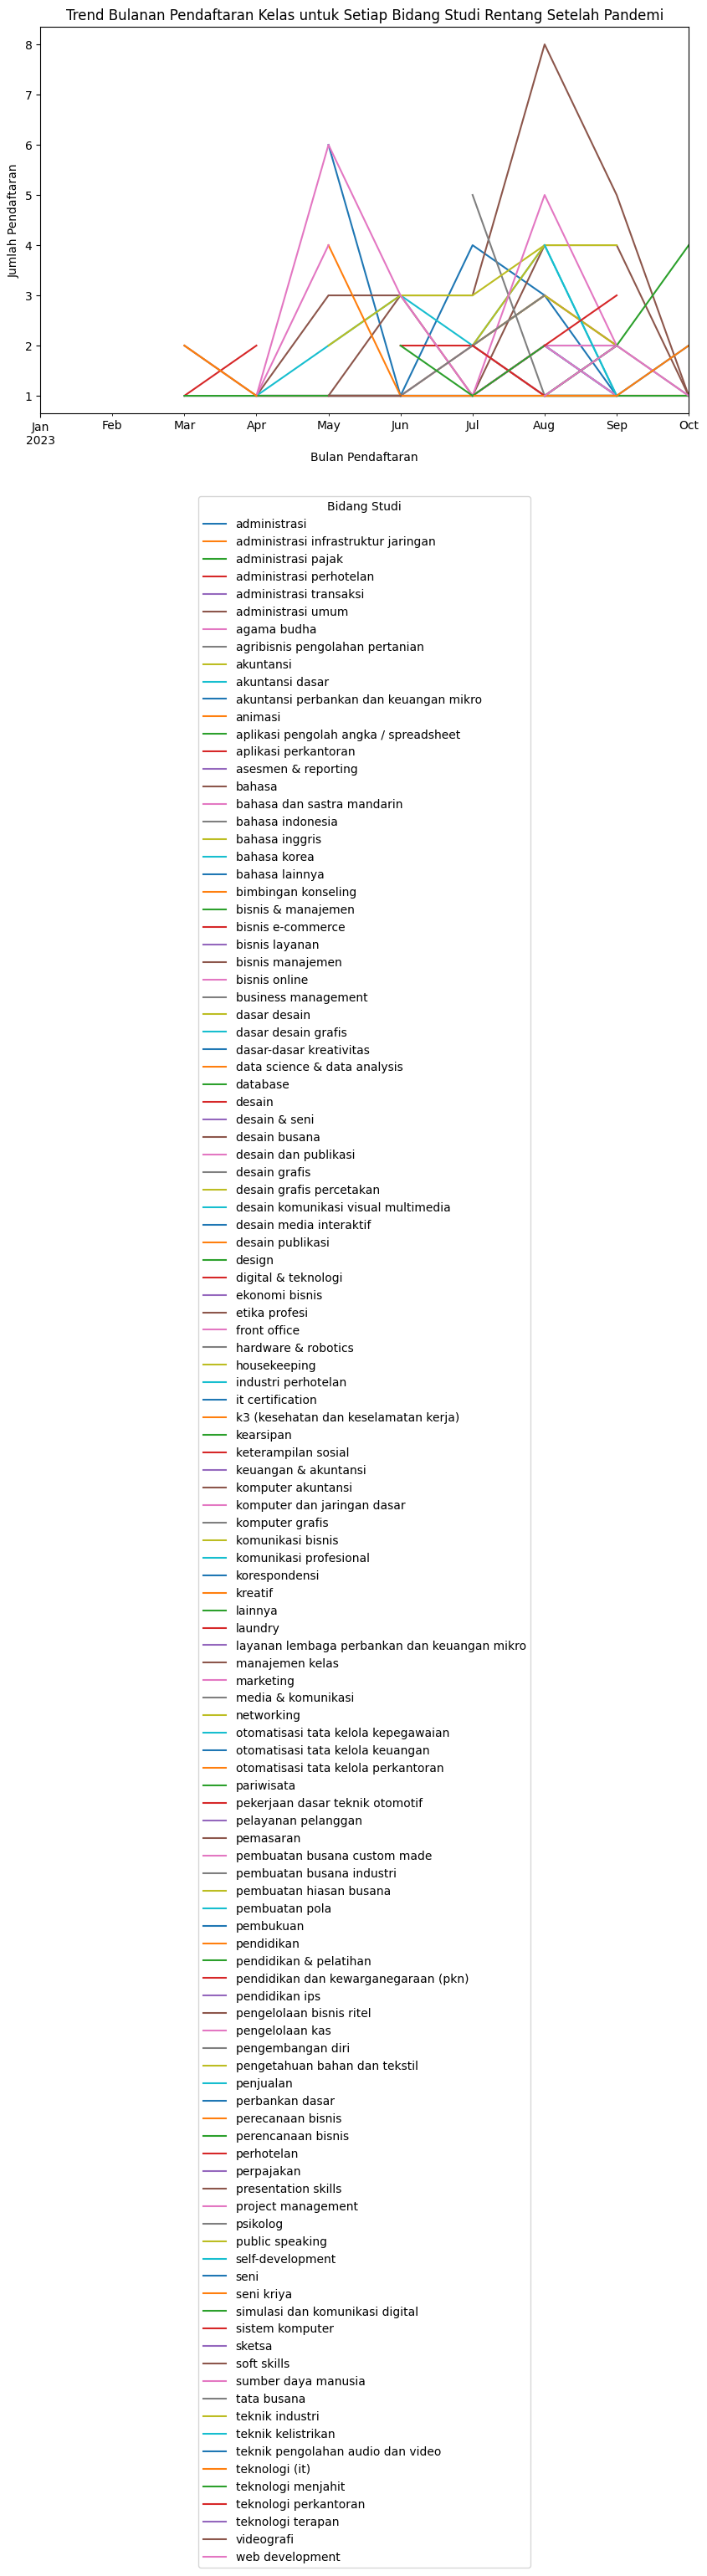

In [ ]:
# Membuat line graph untuk setelah pandemi
# Mengubah kolom tanggal menjadi datetime
data['tanggal_mendaftar'] = pd.to_datetime(data['tanggal_mendaftar'])

# Membuat filter waktu
filter_mendaftar = data['tanggal_mendaftar'] >= '2023-01-01'

# Menerapkan filter dan menghitung jumlah pendaftaran per bulan untuk setiap bidang studi
data_filtered = data[filter_mendaftar]
data_filtered['bulan_mendaftar'] = data_filtered['tanggal_mendaftar'].dt.to_period('M')
trend_pendaftaran = data_filtered.groupby(['bulan_mendaftar', 'bidang_studi']).size().unstack()

# Membuat plot
trend_pendaftaran.plot(kind='line', figsize=(10, 6))
plt.title('Trend Bulanan Pendaftaran Kelas untuk Setiap Bidang Studi Rentang Setelah Pandemi')
plt.xlabel('Bulan Pendaftaran')
plt.ylabel('Jumlah Pendaftaran')
plt.legend(title='Bidang Studi', bbox_to_anchor=(0.5, -0.2), loc='upper center')
plt.tight_layout()
plt.show()

#Problem Question 3

Berapa persen besar pengguna yang memiliki lebih dari 1 kelas yang diminati?

In [ ]:
# Menghitung jumlah kelas yang diikuti setiap pengguna
kelas_per_pengguna = data.groupby('id_pengguna')['id_kelas'].nunique().reset_index()
kelas_per_pengguna.columns = ['id_pengguna', 'jumlah_kelas']

# Menghitung jumlah pengguna yang memiliki lebih dari 1 kelas
lebih_dari_1_kelas = kelas_per_pengguna[kelas_per_pengguna['jumlah_kelas'] > 1].count()['id_pengguna']

# Menghitung total pengguna
total_pengguna = kelas_per_pengguna['id_pengguna'].count()

# Menghitung persen pengguna yang memiliki lebih dari 1 kelas
persen_lebih_dari_1_kelas = (lebih_dari_1_kelas / total_pengguna) * 100

# Menampilkan dataframe kelas_per_pengguna
print("Dataframe kelas per pengguna:")
print(kelas_per_pengguna)

# Menampilkan total pengguna dan pengguna yang memiliki lebih dari 1 kelas
print("\nTotal pengguna:", total_pengguna)
print("Pengguna yang memiliki lebih dari 1 kelas:", lebih_dari_1_kelas)
print("Persentase pengguna yang memiliki lebih dari 1 kelas: {:.2f}%".format(persen_lebih_dari_1_kelas))

Dataframe kelas per pengguna:
                           id_pengguna  jumlah_kelas
0     00027f68f39686d533ebc10c83d9887f             1
1     0002f872b6673a3df109e1a17ae2a7be             1
2     0022481b03794aed232be95fbd4cb99e             1
3     0028252c274cfb8658291a60ccd90646             1
4     002ad432c1b8bee463327c51efc3b55f             1
...                                ...           ...
5211  ffbd8094a02871b42c0eb8728310a60e             1
5212  ffe2c37404bb8d0cad95f6b22bf6b8db             1
5213  fff6b1913698c47cc04ff5a08a25b498             1
5214  fffb9a82eee7b384e8fb0fca7f028ef0             1
5215  ffffadbc2701949b0024a826a7e5319b             1

[5216 rows x 2 columns]

Total pengguna: 5216
Pengguna yang memiliki lebih dari 1 kelas: 23
Persentase pengguna yang memiliki lebih dari 1 kelas: 0.44%


In [ ]:
print(f"Persentase pengguna yang memiliki lebih dari 1 kelas yang diminati: {persen_lebih_dari_1_kelas:.2f}%")

Persentase pengguna yang memiliki lebih dari 1 kelas yang diminati: 0.44%


#Problem Question 4

Jika stakeholders ingin memberikan voucher kelas pada pengguna setia platform MasaDepan.ku, berikanlah daftar pengguna yang berpotensi memiliki tingkat redeem voucher yang tinggi, dilihat dari jumlah kelas yang diikuti dan waktu terakhir pengguna mengakses kelas (updated_at)?

In [ ]:
# 1. Menghitung jumlah kelas yang diikuti setiap pengguna
jumlah_kelas = data.groupby('id_pengguna')['id_kelas'].nunique().reset_index()
jumlah_kelas.columns = ['id_pengguna', 'jumlah_kelas']

In [ ]:
# 2. Mengambil waktu terakhir pengguna mengakses kelas
last_access = data.groupby('id_pengguna')['tanggal_terakhir_akses'].max().reset_index()
last_access.columns = ['id_pengguna', 'tanggal_terakhir_akses']

In [ ]:
# 3. Menggabungkan data
df_clustering = pd.merge(jumlah_kelas, last_access, on='id_pengguna')

Diasumsikan datetime.now itu tanggal 16 Juni 2024

In [ ]:
# 4. Mengubah tanggal_terakhir_akses menjadi selisih hari dari hari ini
df_clustering['hari_sejak_terakhir_akses'] = (datetime.now() - df_clustering['tanggal_terakhir_akses']).dt.days

In [ ]:

# 5. Menghapus kolom tanggal_terakhir_akses karena tidak diperlukan lagi
df_clustering.drop('tanggal_terakhir_akses', axis=1, inplace=True)

Pembagian Cluster beserta karakteristiknya:
- Cluster 0 : Pengguna dengan keterlibatan rendah, yang mungkin tidak terlalu aktif di platform.
- Cluster 1 : Pengguna dengan keterlibatan tinggi, yang sering mengakses platform dan mengikuti banyak kelas.
- Cluster 2 : Pengguna dengan keterlibatan sedang, yang menunjukkan potensi untuk menjadi lebih aktif tetapi tidak seaktif pengguna di cluster 1.

In [ ]:
# 6. Menjalankan clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(df_clustering[['jumlah_kelas', 'hari_sejak_terakhir_akses']])

In [ ]:
# 7. Melihat hasil clustering
df_clustering

,id_pengguna,jumlah_kelas,hari_sejak_terakhir_akses,cluster
0,00027f68f39686d533ebc10c83d9887f,1,753,2
1,0002f872b6673a3df109e1a17ae2a7be,1,1344,0
2,0022481b03794aed232be95fbd4cb99e,1,1179,0
3,0028252c274cfb8658291a60ccd90646,1,1186,0
4,002ad432c1b8bee463327c51efc3b55f,1,1193,0
...,...,...,...,...
5211,ffbd8094a02871b42c0eb8728310a60e,1,738,2
5212,ffe2c37404bb8d0cad95f6b22bf6b8db,1,272,1
5213,fff6b1913698c47cc04ff5a08a25b498,1,272,1
5214,fffb9a82eee7b384e8fb0fca7f028ef0,1,272,1


In [ ]:
df_clustering["cluster"].astype(int)
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id_pengguna                5216 non-null   object
 1   jumlah_kelas               5216 non-null   int64 
 2   hari_sejak_terakhir_akses  5216 non-null   int64 
 3   cluster                    5216 non-null   int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 142.8+ KB


In [ ]:
cluster_avg = df_clustering.drop(columns=["id_pengguna"]).groupby(['cluster'])
cluster_avg.mean()

,jumlah_kelas,hari_sejak_terakhir_akses
cluster,,
0,1.003979,1144.725428
1,1.006012,277.577154
2,1.004146,673.143449


In [ ]:
cluster_avg.describe()

jumlah_kelas                                               \
               count      mean       std  min  25%  50%  75%  max   
cluster                                                             
0             2513.0  1.003979  0.062969  1.0  1.0  1.0  1.0  2.0   
1             1497.0  1.006012  0.085538  1.0  1.0  1.0  1.0  3.0   
2             1206.0  1.004146  0.064282  1.0  1.0  1.0  1.0  2.0   

        hari_sejak_terakhir_akses                                          \
                            count         mean         std    min     25%   
cluster                                                                     
0                          2513.0  1144.725428  143.734668  912.0  1004.0   
1                          1497.0   277.577154   30.567792  236.0   272.0   
2                          1206.0   673.143449   81.568016  477.0   599.0   

                                 
            50%     75%     max  
cluster                          
0        1168.0  1287.0  1370.0  
1         272.0   272.0   475.0  
2         665.0   735.0   906.0

Berdasarkan data diatas, dapat dilihat bahwa Cluster 1 memiliki jumlah kelas terbanyak dan hari sejak terakhir akses paling rendah

In [ ]:
# 8. Filter pengguna dalam cluster 1
cluster_1_pengguna = df_clustering[df_clustering['cluster'] == 1]

In [ ]:
# 9. Mengidentifikasi pengguna dalam cluster 1 dengan pengguna_setia
pengguna_setia = cluster_1_pengguna

# 10. Menampilkan pengguna setia
print("Pengguna yang berpotensi memiliki tingkat redeem voucher yang tinggi:")
pengguna_setia.head(10)

Pengguna yang berpotensi memiliki tingkat redeem voucher yang tinggi:


,id_pengguna,jumlah_kelas,hari_sejak_terakhir_akses,cluster
14,00b953bb7824bf485cad7f610e96f10c,1,237,1
21,00dfe9a7199b926b061f833264887595,1,272,1
23,00f34a812a1a07781d2fd5cc3bea545c,1,272,1
25,0110a98d24de73cfa9ff851e79b0d6a9,1,244,1
26,011791768f3833b0cd880598739636c1,1,326,1
28,0126073930eb5b1609006a71432d7228,1,272,1
29,013f52e4f2bae7a204a237e7d4b41a08,1,272,1
34,019786d3bfdd394a46ddd6a4e0bdf163,1,272,1
35,01995c4129d465c52e55ec8bfd6df107,1,272,1
39,01c57d791fe462632dfa13f41600fd32,1,272,1
